# CH. 4 - NumPy Basics: Arrays and Vectorized Computation

In [1]:
import numpy as np

## 4.1 The NumPy ndarray: A Multidimensional Array Object

In [2]:
data = [5, 0.1, 4, 7.5, 8, 6]

arr1 = np.array(data)
print('one-dimensional:\t', arr1.shape)

arr3 = np.array([data])
print('one-multidimensional:\t', arr3.shape)

data2 = [[5, 3, 1], [3, 4, 6.5]]

arr2 = np.array(data2)
print('bi-multidimentional:\t', arr2.shape)


one-dimensional:	 (6,)
one-multidimensional:	 (1, 6)
bi-multidimentional:	 (2, 3)


In [18]:
print(np.zeros(10))

print(np.zeros((1, 10)))

print(np.ones((4, 5)))

print(np.empty((2, 3, 2)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[[4.65241596e-310 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000]]

 [[0.00000000e+000 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000]]]


#### It’s not safe to assume that np.empty will return an array of all zeros. In some cases, it may return uninitialized “garbage” values.

In [20]:
range_array = np.arange(1, 16)
print(range_array)
print(range_array.shape)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
(15,)


### Data Types for ndarrays

* Since NumPy is focused on numerical computing, the data type, if not specified, will in many cases be float64 (floating point).

In [22]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

arr1.dtype, arr2.dtype

(dtype('float64'), dtype('int32'))

In [25]:
# cast an array from one dtype to another
arr3 = arr1.astype(np.int8)
print(arr3)

# using other array dtype
arr4 = arr2.astype(arr3.dtype)
print(arr4)

[1 2 3]
[1 2 3]


### Arithmetic with NumPy Arrays

In [27]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [31]:
print('Multiplication:')
print(arr * arr)

print('Subtraction:')
print(arr - arr)

print('Scalar operations:')
print(1 / arr)
print(arr * 0.5)

print('Comparison arr2 > arr:')
arr2 = np.array([[0., 4., 1.],[7., 2., 12.]])
print(arr2 > arr)

Multiplication:
[[ 1.  4.  9.]
 [16. 25. 36.]]
Subtraction:
[[0. 0. 0.]
 [0. 0. 0.]]
Scalar operations:
[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[0.5 1.  1.5]
 [2.  2.5 3. ]]
Comparison arr2 > arr:
[[False  True False]
 [ True False  True]]


### Basic Indexing and Slicing

In [36]:
arr = np.arange(10)

print(arr[5])
print(arr[5:8])

# broadcasting
arr[5:8] = 12
arr

5
[5 6 7]


array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

* An important first distinction from Python’s built-in lists is that array **slices are views on the original array**. This means that the data is not copied, and any modifications to the view will be reflected in the source array.

In [38]:
arr_slice = arr[5:8]

arr_slice[1] = 12345
print('arr_slice:\t', arr_slice)
print('arr:\t\t', arr)

arr_slice:	 [   12 12345    12]
arr:		 [    0     1     2     3     4    12 12345    12     8     9]


* If you want a copy of a slice of an ndarray instead of a view, you
will need to explicitly copy the array—for example,
`arr[5:8].copy()`

In [40]:
# Multidimensional arrays
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(arr2d[1])
print(arr2d[0][2])

[4 5 6]
3


* In multidimensional arrays, if you omit later indices, the returned object will be a
lower dimensional ndarray consisting of all the data along the higher dimensions. So
in the 2 × 2 × 3 array arr3d :

In [41]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(arr3d)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [42]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

### Indexing with slices

As you can see, it has sliced along axis 0, the first axis. A slice, therefore, selects a
range of elements along an axis. It can be helpful to read the expression arr2d[:2] as
“select the first two rows of arr2d .”

In [48]:
print('array:')
print(arr2d)
print('slice first two rows:')
print(arr2d[:2])
print('slicing rows and cols:')
print(arr2d[:2, 1:])

array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
slice first two rows:
[[1 2 3]
 [4 5 6]]
slicing rows and cols:
[[2 3]
 [5 6]]


* When slicing like this, you always obtain array views of the same number of dimensions. By mixing integer indexes and slices, you get lower dimensional slices:

In [50]:
print(arr2d[:, :1])
print(arr2d[:, 0])

[[1]
 [4]
 [7]]
[1 4 7]


### Boolean Indexing

In [52]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

data = np.random.randn(7, 4)

print(data)

[[-0.47064095  1.06622792 -1.77086815  0.24091025]
 [-0.42099201 -0.80591926  0.99028269 -0.24648701]
 [ 0.70693319  0.54977135  0.03618785 -1.80517674]
 [-1.45875019 -0.49793811 -0.36025506  1.53865052]
 [ 0.25836948  0.31914181  0.84351472 -0.08940476]
 [ 1.55108899 -0.20507905  0.4463085   0.93254404]
 [-1.12832416 -0.8924859   0.34300332  1.2649423 ]]


* Like arithmetic operations, comparisons (such as == ) with arrays are also vectorized.

In [54]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

* This boolean array can be passed when indexing the array:

In [55]:
data[names == 'Bob']

array([[-0.47064095,  1.06622792, -1.77086815,  0.24091025],
       [-1.45875019, -0.49793811, -0.36025506,  1.53865052]])

* The boolean array must be of the same length as the array axis it’s indexing (though Boolean selection will not fail if the boolean array is not the correct length). You can even mix and match boolean arrays with slices or integers. 

In [56]:
# setting negative values to zero
data[data < 0] = 0

data

array([[0.        , 1.06622792, 0.        , 0.24091025],
       [0.        , 0.        , 0.99028269, 0.        ],
       [0.70693319, 0.54977135, 0.03618785, 0.        ],
       [0.        , 0.        , 0.        , 1.53865052],
       [0.25836948, 0.31914181, 0.84351472, 0.        ],
       [1.55108899, 0.        , 0.4463085 , 0.93254404],
       [0.        , 0.        , 0.34300332, 1.2649423 ]])

### Fancy Indexing

* Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays.
* To select out a subset of the rows in a particular order, you can simply pass a list or ndarray of integers specifying the desired order.
* Keep in mind that fancy indexing, unlike slicing, always copies the data into a new array.

In [57]:
data[[1,2,3]]

array([[0.        , 0.        , 0.99028269, 0.        ],
       [0.70693319, 0.54977135, 0.03618785, 0.        ],
       [0.        , 0.        , 0.        , 1.53865052]])

In [59]:
data[[-3,-2,-1]]

array([[0.25836948, 0.31914181, 0.84351472, 0.        ],
       [1.55108899, 0.        , 0.4463085 , 0.93254404],
       [0.        , 0.        , 0.34300332, 1.2649423 ]])

* Passing multiple index arrays does something slightly different; it selects a onedimensional array of elements corresponding to each tuple of indices:

In [62]:
# Selecting (0,0), (1,1), (2,2), (3,3)
data[[0,1,2,3],[0,1,2,3]]

array([0.        , 0.        , 0.03618785, 1.53865052])

* To select the rectangular region formed by selecting a subset of the matrix’s rows and columns, do:

In [69]:
data[[0, 1, 2]][:, [0, 1, 2]]

array([[0.        , 1.06622792, 0.        ],
       [0.        , 0.        , 0.99028269],
       [0.70693319, 0.54977135, 0.03618785]])

### Transposing Arrays and Swapping Axes

In [73]:
arr = np.arange(16).reshape((4,4))

print(arr)
print(arr.T)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 0  4  8 12]
 [ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]]


In [74]:
# dot product
np.dot(arr.T, arr)

array([[224, 248, 272, 296],
       [248, 276, 304, 332],
       [272, 304, 336, 368],
       [296, 332, 368, 404]])

In [75]:
arr2 = arr.reshape((2, 2, 4)).copy()

arr2

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [76]:
arr2.T

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [80]:
arr2.transpose((2, 1, 0))

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [85]:
arr2.swapaxes(0,2)

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

<br><br>

## 4.2 Universal Functions: Fast Element-Wise Array Functions

* A universal function, or ufunc, is a function that performs element-wise operations on data in ndarrays.

In [88]:
arr = np.arange(10)

np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [89]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [93]:
x, y = np.random.randn(8), np.random.randn(8)

print(x)
print(y)

print(np.maximum(x,y))

[ 1.81345124  0.3130106  -1.05245975 -1.85907955  0.00480942 -1.43275894
  0.7732      0.85932761]
[-0.69796931 -0.65091527  0.66215488  1.11691375 -0.37511088 -1.5091369
 -1.96113652 -1.14803756]
[ 1.81345124  0.3130106   0.66215488  1.11691375  0.00480942 -1.43275894
  0.7732      0.85932761]


* While not common, a ufunc can return multiple arrays. modf is one example, a vectorized version of the built-in Python divmod ; it returns the fractional and integral parts of a floating-point array:

In [94]:
arr = np.random.randn(7) * 5
arr

array([ 7.21991036, -6.77476958,  4.38738661,  2.42517337,  8.00633318,
        3.22318345,  5.37154348])

In [95]:
remainder, whole_part = np.modf(arr)

print(remainder, whole_part)

[ 0.21991036 -0.77476958  0.38738661  0.42517337  0.00633318  0.22318345
  0.37154348] [ 7. -6.  4.  2.  8.  3.  5.]


<br><br> 
## 4.3 Array-Oriented Programming with Arrays



* The `np.meshgrid` function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays:

In [106]:
points = np.arange(-2, 2, 1)
points

array([-2, -1,  0,  1])

In [107]:
xs, ys = np.meshgrid(points, points)
xs, ys

(array([[-2, -1,  0,  1],
        [-2, -1,  0,  1],
        [-2, -1,  0,  1],
        [-2, -1,  0,  1]]),
 array([[-2, -2, -2, -2],
        [-1, -1, -1, -1],
        [ 0,  0,  0,  0],
        [ 1,  1,  1,  1]]))

In [108]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[2.82842712, 2.23606798, 2.        , 2.23606798],
       [2.23606798, 1.41421356, 1.        , 1.41421356],
       [2.        , 1.        , 0.        , 1.        ],
       [2.23606798, 1.41421356, 1.        , 1.41421356]])

### Expressing Conditional Logic as Array Operations

* The numpy.where function is a vectorized version of the ternary expression x if condition else y.

In [109]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [110]:
np.where(cond, xarr, yarr)

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [111]:
np.where(xarr > 1.2, 'bigger', 'smaller')

array(['smaller', 'smaller', 'bigger', 'bigger', 'bigger'], dtype='<U7')

### Mathematical and Statistical Methods 

In [112]:
arr = np.random.randn(5,4)
arr

array([[-0.55263108, -1.37520359,  2.1939318 ,  0.42607935],
       [ 0.55869317, -0.5821427 ,  1.76792027, -1.31126761],
       [ 0.29901281,  1.92499547,  1.17464311,  0.53733533],
       [-0.12236405,  0.58975389, -0.64799063,  1.1476711 ],
       [-0.19047183, -0.66950058,  0.28174035,  0.72978082]])

In [113]:
print(arr.mean())
print(arr.sum())
print(arr.std())

0.30899927018821854
6.179985403764371
0.985841569244041


* Functions like mean and sum take an optional axis argument that computes the statistic over the given axis, resulting in an array with one fewer dimension

In [115]:
print(arr.mean(axis=0)) # across rows
print(arr.mean(axis=1)) # across columns

[-0.00155219 -0.0224195   0.95404898  0.3059198 ]
[0.17304412 0.10830078 0.98399668 0.24176758 0.03788719]


In [116]:
np.cumsum(arr)

array([-0.55263108, -1.92783467,  0.26609713,  0.69217648,  1.25086966,
        0.66872695,  2.43664722,  1.12537961,  1.42439242,  3.3493879 ,
        4.52403101,  5.06136634,  4.93900229,  5.52875618,  4.88076555,
        6.02843665,  5.83796482,  5.16846423,  5.45020458,  6.1799854 ])

In [120]:
arr2 = np.array([[0, 1, 2],[3, 4, 5], [6, 7, 8]])

print(arr2)
print(arr2.cumsum(1))
print(arr2.cumprod(1))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  3]
 [ 3  7 12]
 [ 6 13 21]]
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


In [122]:
bools = arr > 0
bools

array([[False, False,  True,  True],
       [ True, False,  True, False],
       [ True,  True,  True,  True],
       [False,  True, False,  True],
       [False, False,  True,  True]])

In [124]:
# Methods for Boolean Arrays
print(bools.sum())
print(bools.any())
print(bools.all())

12
True
False


### Sorting

* You can sort each one-dimensional section of values in a multidimensional array inplace along an axis by passing the axis number to sort

In [135]:
arr3 = np.random.randn(2, 3)
print(arr3)

arr3.sort(1)
print()
print(arr3)

[[ 0.29583741 -0.65930676 -0.1091327 ]
 [-0.42209875 -0.55667848  0.4071756 ]]

[[-0.65930676 -0.1091327   0.29583741]
 [-0.55667848 -0.42209875  0.4071756 ]]


In [137]:
# unique
np.unique(bools)

array([False,  True])

* `np.in1d` tests membership of the values in one array in another, returning a boolean array:

In [138]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## 4.5 Linear Algebra

* Unlike some languages like MATLAB, multiplying two two-dimensional arrays with `*` is an element-wise product instead of a matrix dot product. Thus, there is a function `dot` , both an array method and a function in the numpy namespace, for matrix multiplication

In [148]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

print(x.shape, y.shape, '\n')
print(x, '\n\n', y, '\n')

# Matrix Multiplications, 3 ways
print(np.dot(x,y), '\n')
print(x.dot(y), '\n')
print(x @ y)

(2, 3) (3, 2) 

[[1. 2. 3.]
 [4. 5. 6.]] 

 [[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]] 

[[ 28.  64.]
 [ 67. 181.]] 

[[ 28.  64.]
 [ 67. 181.]] 

[[ 28.  64.]
 [ 67. 181.]]


In [144]:
ones = np.ones(3)
ones.shape, ones

((3,), array([1., 1., 1.]))

In [150]:
# Inverse and QR Factorization with numpy.linalg

from numpy.linalg import inv, qr

x = np.random.randn(5,5)

mat = x.T.dot(x)

print(mat, '\n')
print(inv(mat), '\n')

q, r = qr(mat)

print(r)

[[ 4.59719986  1.73932501  1.42816458 -0.42289249 -6.9663489 ]
 [ 1.73932501  3.49310139 -1.58039776  2.62251937 -5.80106238]
 [ 1.42816458 -1.58039776  4.54984327  0.93692616 -2.20074472]
 [-0.42289249  2.62251937  0.93692616  7.16353549 -6.01026682]
 [-6.9663489  -5.80106238 -2.20074472 -6.01026682 18.38658986]] 

[[ 6.37421854 -5.9881843  -4.28122259  4.32614672  1.42748699]
 [-5.9881843   8.75929759  5.71079138 -4.57258189 -0.31637147]
 [-4.28122259  5.71079138  4.01941165 -3.18942963 -0.38177048]
 [ 4.32614672 -4.57258189 -3.18942963  3.21138053  0.86442066]
 [ 1.42748699 -0.31637147 -0.38177048  0.86442066  0.7322892 ]] 

[[-8.6549412  -5.90619564 -2.91736172 -4.94464218 19.7348955 ]
 [ 0.         -4.83440291  2.53056153 -6.49364201  7.19179486]
 [ 0.          0.         -4.00559007 -5.35758793  4.37263111]
 [ 0.          0.          0.         -0.2306585   0.79205504]
 [ 0.          0.          0.          0.          0.52947647]]


<br><br>

## 4.6 Pseudorandom Number Generation

In [151]:
# Normal distribution
samples = np.random.normal(size=(4,4))

samples

array([[-0.19568617,  0.84073315, -1.11493824,  1.34003324],
       [-1.57702999,  1.10594664,  1.01097645,  0.48617851],
       [ 0.40031461, -0.22766814,  0.18656149, -0.91660315],
       [ 1.00412069, -1.36453057, -0.14590493, -0.01306383]])

In [152]:
# Set Seed
np.random.seed(100)

* The data generation functions in numpy.random use a global random seed. To avoid global state, you can use `numpy.random.RandomState` to create a random number generator isolated from others

In [154]:
rng = np.random.RandomState(1234)

print(rng.randn(10), '\n')
print(rng.normal(size=(10,)), '\n')

[ 0.47143516 -1.19097569  1.43270697 -0.3126519  -0.72058873  0.88716294
  0.85958841 -0.6365235   0.01569637 -2.24268495] 

[ 1.15003572  0.99194602  0.95332413 -2.02125482 -0.33407737  0.00211836
  0.40545341  0.28909194  1.32115819 -1.54690555] 



## 4.7 Example: Random Walks

In [176]:
nsteps = 1000

draws = np.random.randint(0, 2, size=nsteps)
print('draws:\t', draws[:20], '... \n')

steps = np.where(draws > 0, 1, -1)
print('steps:\t', steps[:20], '... \n')

walk = steps.cumsum()
print('walk:\t', walk[:20], '... \n')

draws:	 [1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1] ... 

steps:	 [ 1  1  1 -1 -1  1  1  1  1  1 -1  1 -1  1 -1  1 -1 -1 -1  1] ... 

walk:	 [1 2 3 2 1 2 3 4 5 6 5 6 5 6 5 6 5 4 3 4] ... 



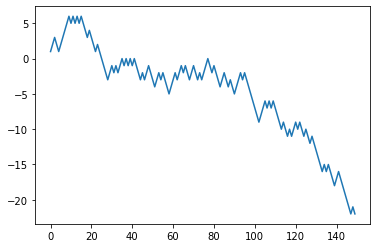

In [177]:
import matplotlib.pyplot as plt

plt.plot(walk[:150])